In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as sp
import random

In [20]:
# Part I Biased coin tossing:

# get posterior P(H|Data) = (P(Data|H) * P(H)) / P(Data)
# data (array): is the result from coin tossing: 1 is for head, 0 is for tails
# prior: prior distribution of the parameter H (probability to get heads)
# H (array): set of values of H (probability to get heads), 
def getPosterior(data, prior, H):
    n = len(data)
    h = np.sum(data)
    likelihood = sp.comb(n, h) * H**h * (1-H)**(n-h)
    posterior  = prior * likelihood
    # Normalize posterior
    #posterior = posterior / (np.sum(posterior))
    return posterior

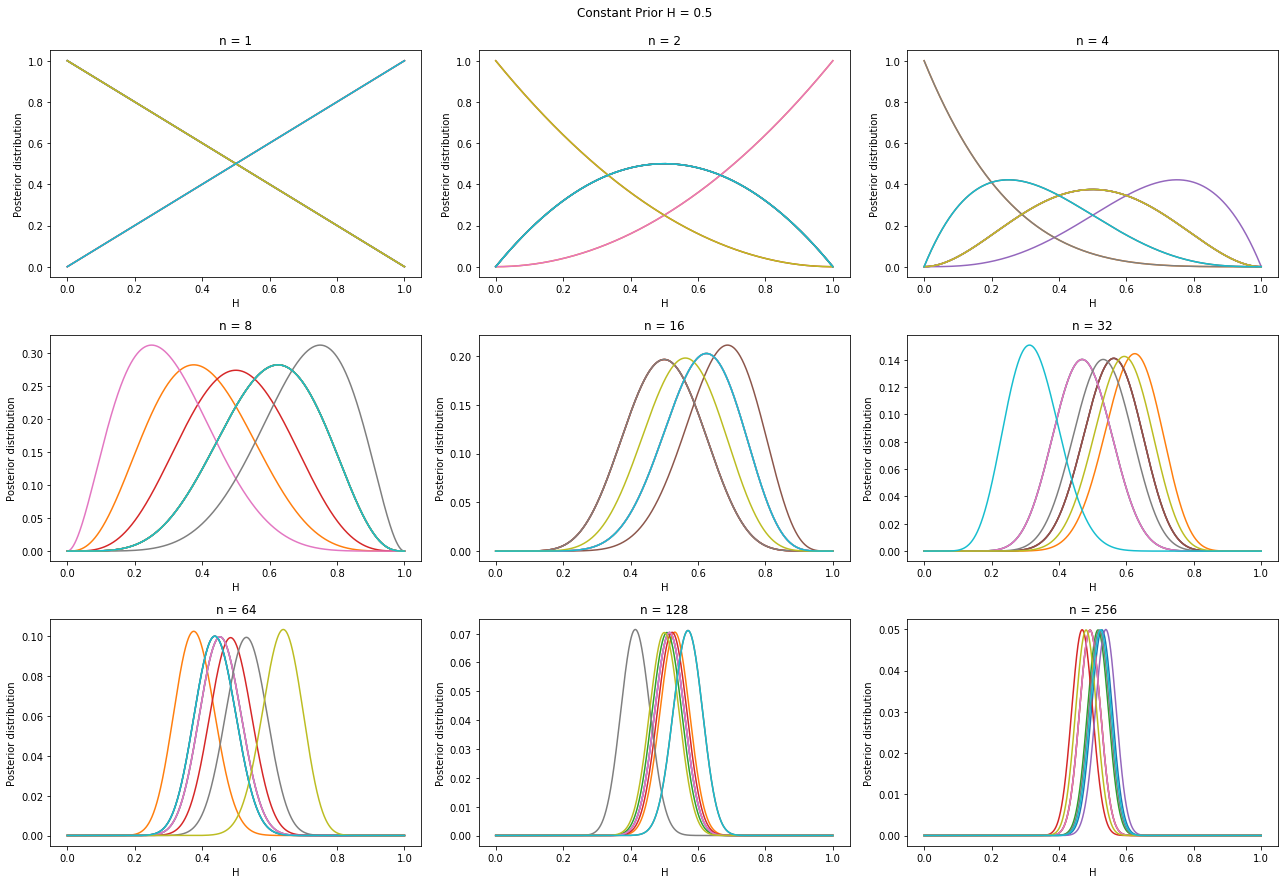

In [25]:
# Prior is uniform, true value is H = 0.5
H = np.linspace(0, 1, 10000)
H_true_value = 0.5

fig = plt.figure(figsize = (18, 12))
fig.suptitle("Constant Prior H = " + str(H_true_value), y = 1.02)

for i in range(9):
    n = 2**i # number of trials
    ax = fig.add_subplot(3, 3, i + 1) # 3x3 grid, i+1 th plot
    ax.set_title("n = " + str(n))
    ax.set_xlabel("H")
    ax.set_ylabel("Posterior distribution")
    for j in range(10):
        data = np.random.binomial(1, H_true_value, n)
        prior = stats.uniform.pdf(H)
        posterior = getPosterior(data, prior, H) 
        ax.plot(H, posterior)
plt.tight_layout()

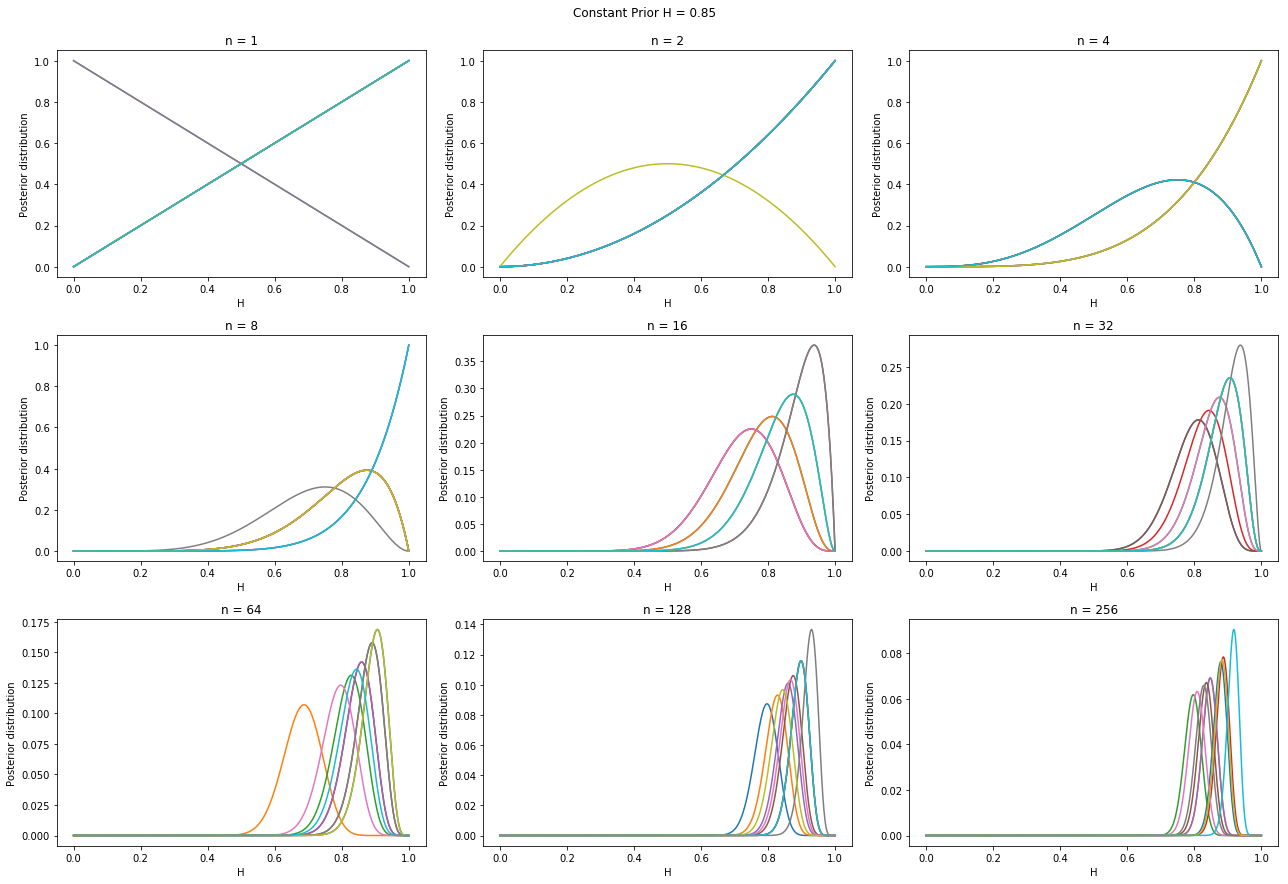

In [26]:
# Prior is uniform, true value is H = 0.85
H = np.linspace(0, 1, 10000)
H_true_value = 0.85

fig = plt.figure(figsize = (18, 12))
fig.suptitle("Constant Prior H = " + str(H_true_value), y = 1.02)

for i in range(9):
    n = 2**i # number of trials
    ax = fig.add_subplot(3, 3, i + 1) # 3x3 grid, i+1 th plot
    ax.set_title("n = " + str(n))
    ax.set_xlabel("H")
    ax.set_ylabel("Posterior distribution")
    for j in range(10):
        data = np.random.binomial(1, H_true_value, n)
        prior = stats.uniform.pdf(H)
        posterior = getPosterior(data, prior, H) 
        ax.plot(H, posterior)
plt.tight_layout()

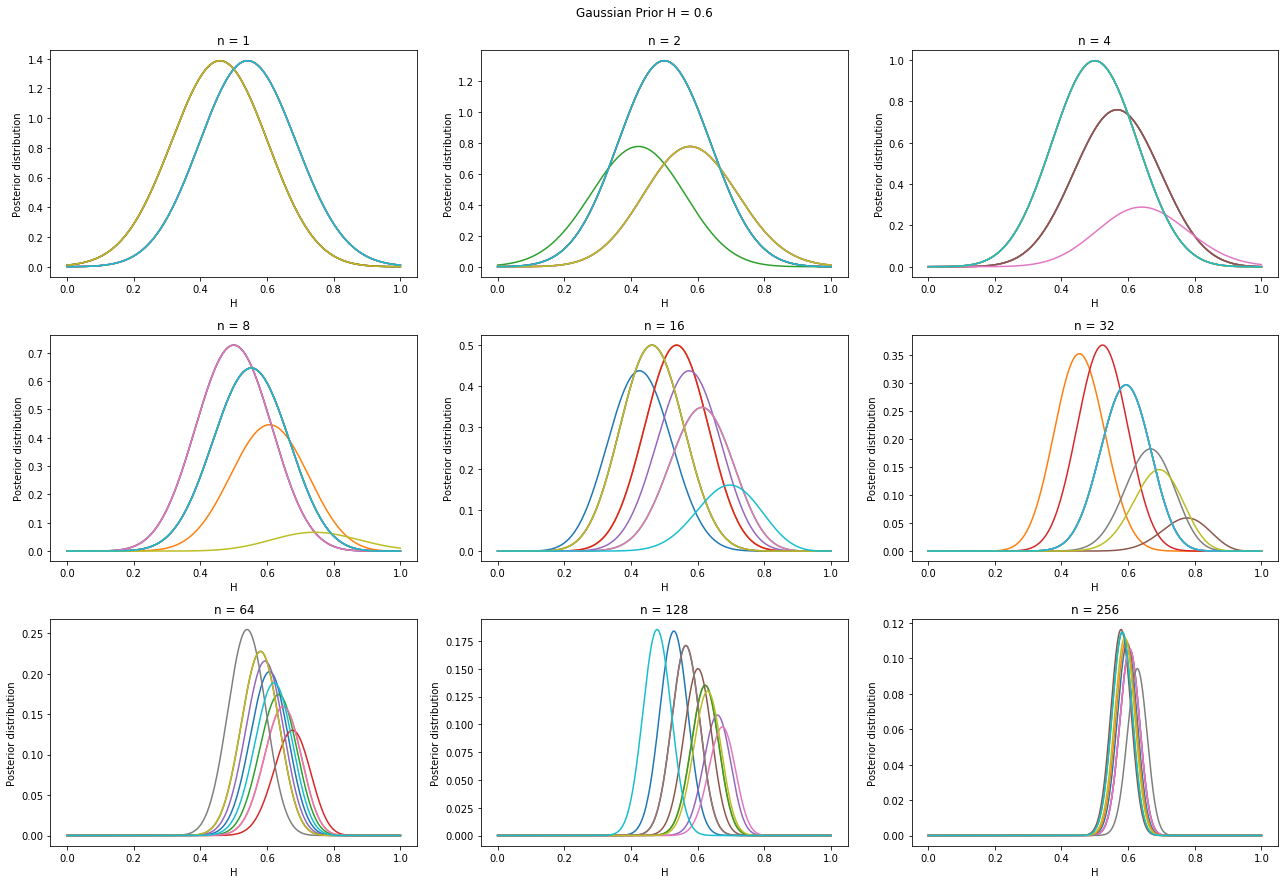

In [27]:
# Gaussian prior (center is at H = 0.5, std = 0.15)
# true value within 1 std 
H = np.linspace(0, 1, 10000)
H_true_value = 0.6

fig = plt.figure(figsize = (18, 12))
fig.suptitle("Gaussian Prior H = " + str(H_true_value), y = 1.02)

for i in range(9):
    n = 2**i # number of trials
    ax = fig.add_subplot(3, 3, i + 1) # 3x3 grid, i+1 th plot
    ax.set_title("n = " + str(n))
    ax.set_xlabel("H")
    ax.set_ylabel("Posterior distribution")
    for j in range(10):
        data = np.random.binomial(1, H_true_value, n)
        prior = stats.norm.pdf(H, 0.5, 0.15)
        posterior = getPosterior(data, prior, H) 
        ax.plot(H, posterior)
plt.tight_layout()

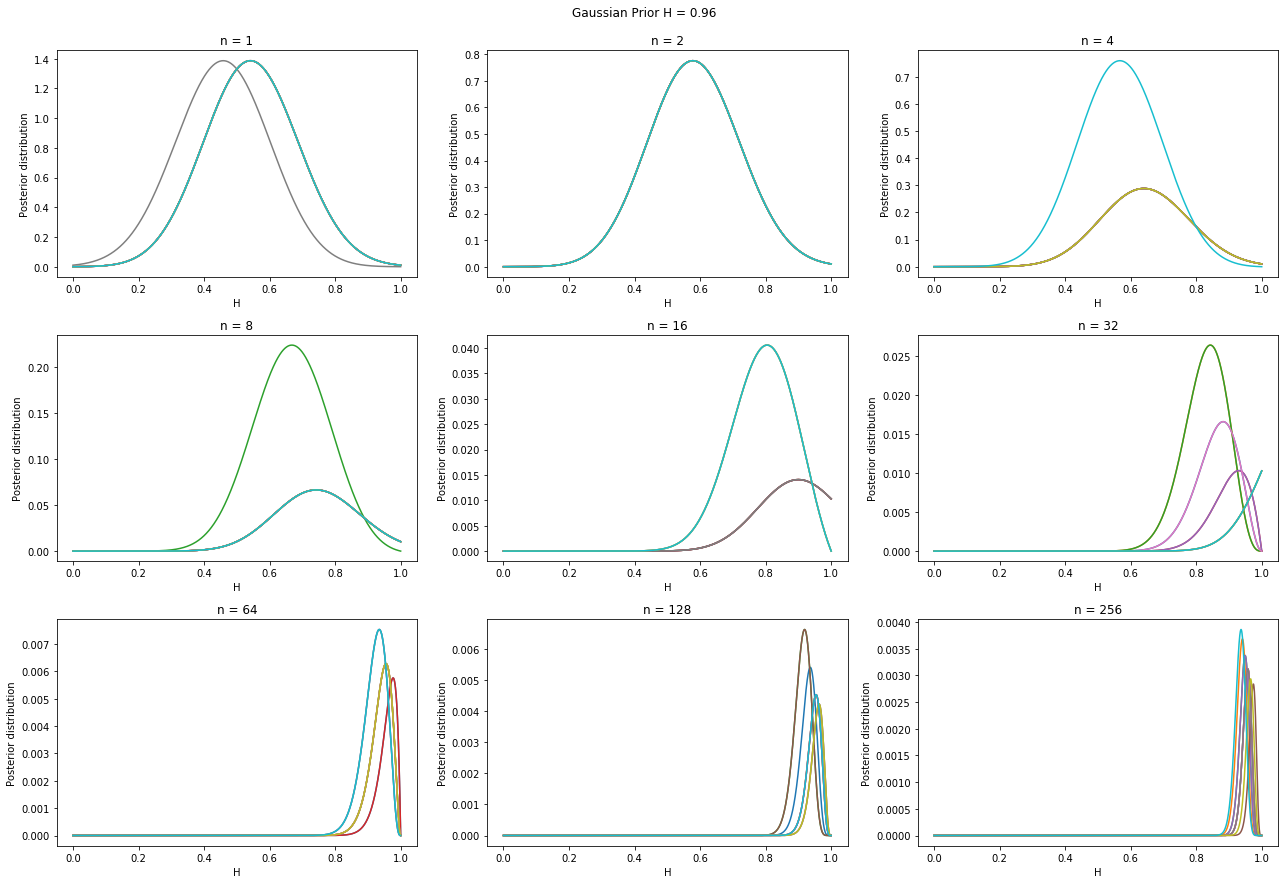

In [29]:
# Gaussian prior (center is at H = 0.5, std = 0.15)
# true value 3 stds away 
H = np.linspace(0, 1, 10000)
H_true_value = 0.96

fig = plt.figure(figsize = (18, 12))
fig.suptitle("Gaussian Prior H = " + str(H_true_value), y = 1.02)

for i in range(9):
    n = 2**i # number of trials
    ax = fig.add_subplot(3, 3, i + 1) # 3x3 grid, i+1 th plot
    ax.set_title("n = " + str(n))
    ax.set_xlabel("H")
    ax.set_ylabel("Posterior distribution")
    for j in range(10):
        data = np.random.binomial(1, H_true_value, n)
        prior = stats.norm.pdf(H, 0.5, 0.15)
        posterior = getPosterior(data, prior, H) 
        ax.plot(H, posterior)
plt.tight_layout()

In [65]:
def get_x_k_and_counts(alpha, beta, N_flashes):
    # Use the lorentzian distribution to generate data for alpha
    np.random.seed()
    flashes = stats.cauchy.rvs(loc=alpha, scale=beta, size=N_flashes)
    # Assume that the detectors are placed at integer values of x
    flashes = np.around(flashes)
    # Then count the number of flashes at each location:
    x_k, counts_x_k = np.unique(flashes, return_counts=True)
    return x_k, counts_x_k
#plt.bar(x_k, counts_x_k)
#plt.xlabel('Location of detector {x_k}')
#plt.ylabel('Number of flashes detected')
#plt.title('Number of flashes detected at location')
#plt.ylim(0, 200)
#plt.show()

In [99]:
# Part II: Light house 
# Find the likelihood of getting a specific data set of flashes 
# (number of flashes detected by photodetector at some location)
def log_likelihood_data(data, data_counts, alpha, beta):
    likelihood_array = -data_counts * ((np.log(np.pi * beta) + np.log(1 + (data-alpha)**2/beta**2)))
    log_likelihood = np.sum(likelihood_array)
    return log_likelihood

N_flashes = 1
mean = 7.2
most probable alpha = 3.6006006006006017
N_flashes = 2
mean = -0.65
most probable alpha = 1.0780780780780783
N_flashes = 4
mean = 2.55
most probable alpha = 0.6216216216216226
N_flashes = 8
mean = 0.875
most probable alpha = 1.081081081081082
N_flashes = 16
mean = -9.75625
most probable alpha = 1.1081081081081083
N_flashes = 32
mean = 0.15
most probable alpha = 0.9549549549549552
N_flashes = 64
mean = 0.296875
most probable alpha = 1.0000000000000007
N_flashes = 128
mean = 0.5828125
most probable alpha = 0.9849849849849852
N_flashes = 256
mean = 2.884765625
most probable alpha = 0.9849849849849852
N_flashes = 512
mean = -14.1484375
most probable alpha = 1.0090090090090098
N_flashes = 1024
mean = -0.16220703125
most probable alpha = 1.000000000000001
N_flashes = 2048
mean = 1.731201171875
most probable alpha = 1.0000000000000009


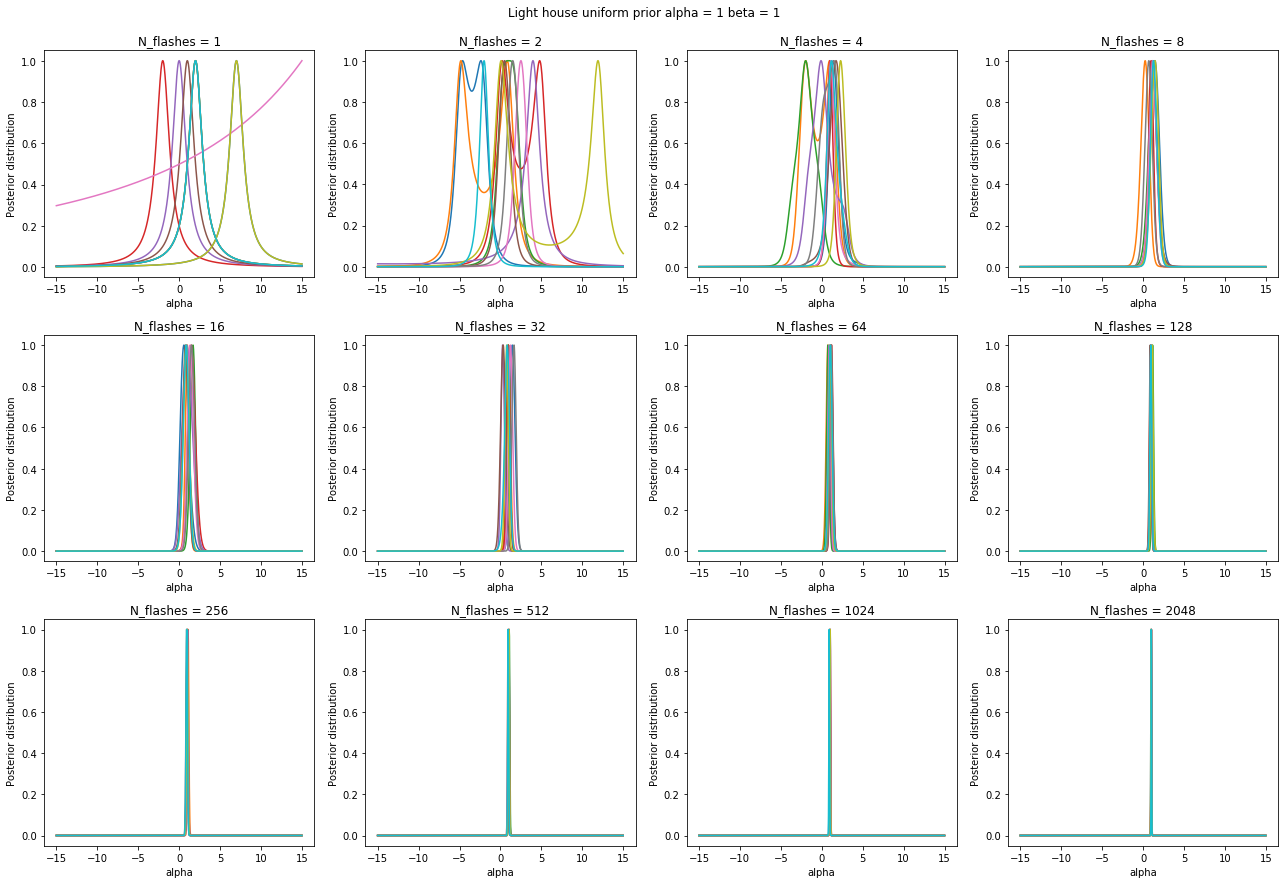

In [100]:
# Assume true values for alpha and beta are both 1 km
alpha = 1
beta = 1

fig = plt.figure(figsize = (18, 12))
fig.suptitle("Light house uniform prior alpha = " + str(beta) + " beta = " + str(beta), y = 1.02)


# We use a uniform prior for alpha 
# By looking at the values of c from the graph, we take alpha in [-20,20]
alpha_prior = np.linspace(-15, 15, 1000)
# We then calculate the likelihood for each value of alpha 
likelihood_log = np.zeros(len(alpha_prior))
mean = np.zeros(10)
mean_n_trial = np.zeros(12)
most_probable_alpha = np.zeros(10)
most_probable_alpha_n_trials = np.zeros(12)

for i in range(12):
    N_flashes = 2**i
    ax = fig.add_subplot(3, 4, i + 1)
    ax.set_title("N_flashes = " + str(N_flashes))
    ax.set_xlabel("alpha")
    ax.set_ylabel("Posterior distribution")
    for j in range(10):
        data = get_x_k_and_counts(alpha, beta, N_flashes)
        x_k = data[0]
        counts = data[1]
        for k in range(len(alpha_prior)):
            likelihood_log[k] = log_likelihood_data(x_k, counts, alpha_prior[k], beta)
        posterior = np.exp(likelihood_log-np.max(likelihood_log))
        mean[j] = np.sum(x_k * counts) / np.sum(counts)
        most_probable_alpha[j] = alpha_prior[np.argmax(posterior)]
        ax.plot(alpha_prior, posterior)
    mean_n_trial[i] = np.mean(mean)
    most_probable_alpha_n_trials[i] = np.mean(most_probable_alpha) 
plt.tight_layout()

for a in range(12):
    print("N_flashes = " + str(2**a))
    print("mean = " + str(mean_n_trial[a]))
    print("most probable alpha = " + str(most_probable_alpha_n_trials[a]))

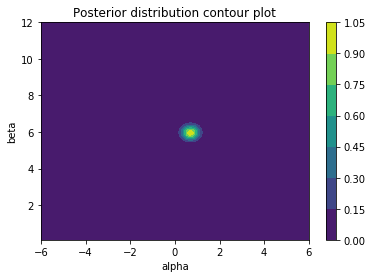

In [107]:
# Unknown values of alpha and beta
# Use uniform prior for both alpha and beta
alpha_prior_unknown = np.linspace(-6, 6, 500)
beta_prior_unknown = np.linspace(0.1, 12, 500) # width is positive, cannot be zero, will get division error

log_like_unknown = np.zeros((len(beta_prior_unknown), len(alpha_prior_unknown)))

# We first generate a set of data with alpha = 1, beta  = 6,
# and pretend we do not know alpha and beta
data = get_x_k_and_counts(1, 6, 1000)
x_k = data[0]
counts = data[1]

for i in range(len(beta_prior_unknown)):
    for j in range(len(alpha_prior_unknown)):
        log_like_unknown[i, j] = log_likelihood_data(x_k, counts, alpha_prior_unknown[j], beta_prior_unknown[i])

posterior_unknown = np.exp(log_like_unknown - np.max(log_like_unknown))

#plt.imshow(posterior_unknown, extent=[alpha_prior_unknown[0], alpha_prior_unknown[-1], beta_prior_unknown[0], beta_prior_unknown[-1]])
#plt.title("Posterior distribution of location of lighthouse\n n = 500");
#plt.xlabel("alpha");
#plt.ylabel("beta");

fig,ax=plt.subplots(1,1)
cp = ax.contourf(alpha_prior_unknown, beta_prior_unknown, posterior_unknown)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Posterior distribution contour plot')
ax.set_ylabel('beta')
ax.set_xlabel('alpha')
plt.show()